In [1]:
import re
import os
import tweepy 
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

nltk.download('stopwords')
# Global Parameters
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lihangqian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
API_key = "d0cuiiTyhO4hR2iQipachjNMc"   
API_key_secret = "PmGNOYpsuvPMMEKM5BtrHHbaOWxRrKFsJSd4ysjMlOBUCn8Xcc"   
access_token = "1227382295839072256-lJdD1BrWt2tBQe3V19upiHHwtqIVKT"   
access_token_secret = "1owiuW6iWa2DVUIb0VkwquYYolqD5jeYeJVn6IlQvd8iM" 
auth = tweepy.OAuthHandler(API_key, API_key_secret)    
auth.set_access_token(access_token, access_token_secret)   
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [4]:
def get_twitter_by_location(text_query,max_tweets,coordinates):
    
    # within a 50-mile radius of Las Vegas, NV (Lat 36.169786, Long -115.139858) that have the keyword Coronavirus.
    #coordinates = '36.169786,-115.139858,100mi'
    # Creation of query method using parameters
    tweets = tweepy.Cursor(api.search, tweet_mode='extended', q = text_query, geocode = coordinates, count = 100).items(max_tweets)
#   tweets = tweepy.Cursor(api.search, q = text_query, geocode = coordinates, count = 100).items(max_tweets)
    # Pulling information from tweets iterable object
    # Add or remove tweet information you want in the below list comprehension
    tweets_list = [[tweet.full_text, tweet.created_at, tweet.id_str, tweet.user.name, tweet.user.screen_name, tweet.user.id_str, tweet.user.location, tweet.user.url, tweet.user.description, tweet.user.verified, tweet.user.followers_count, tweet.user.friends_count, tweet.user.favourites_count, tweet.user.statuses_count, tweet.user.listed_count, tweet.user.created_at, tweet.user.profile_image_url_https, tweet.user.default_profile, tweet.user.default_profile_image, tweet.lang] for tweet in tweets]
    
    # Creation of dataframe from tweets_list
    # Did not include column names to simplify code
    tweets_df = pd.DataFrame(tweets_list)
    return tweets_df

In [5]:
# hashtag about astrazeneca vaccine: 
text_query_astrazeneca='#astrazeneca OR #oxfordastrazeneca OR #astrazenecavaccine OR #astrazenecacovid OR #astrazenecavaccinated'

In [6]:
# hashtag about pfizer vaccine: 
text_query_pfizer='#pfizer OR #pfizervaccine OR #PfizerGang OR #Pfizercovid OR pfizervaccinated OR #pfizerbiontech'

In [7]:
# hashtag about Janssen vaccine: 
text_query_janssen='#janssen OR #janssenvaccine OR #janssencovid OR #johnsonandjohnson OR #janssenvaccinated OR #JohnsonAndJohnsonCOVIDVaccine'

In [8]:
# hashtag about moderna vaccine: 
text_query_moderna='#moderna OR #modernavaccine OR #modernacovid OR #modernavaccinated'

In [9]:
# hashtag about sputnik vaccine: 
text_query_sputnik='#sputnik OR #sputnikvaccine OR #sputnikcovid OR #SputnikV OR #sputnikvaccinated'

In [10]:
#CoronaVac
text_query_CoronaVac='#Sinovac OR #CoronaVac OR #SinovacBiotech OR #YinWeidong OR #CoronaVacCovid OR #CoronaVacvaccinated'

In [11]:
max_tweets= 10000

In [12]:
# tweets_df_astrazeneca =get_twitter_by_location(text_query_astrazeneca,max_tweets,'39.34748,-100.07561,1500mi')

In [17]:
# len(tweets_df_astrazeneca)

In [18]:
# tweets_df_pfizer =get_twitter_by_location(text_query_pfizer,max_tweets,'39.34748,-100.07561,1500mi')

In [19]:
# tweets_df_janssen =get_twitter_by_location(text_query_janssen,max_tweets,'39.34748,-100.07561,1500mi')

In [20]:
# tweets_df__moderna =get_twitter_by_location(text_query_moderna,max_tweets,'39.34748,-100.07561,1500mi')

In [21]:
# tweets_df_sputnik =get_twitter_by_location(text_query_sputnik,max_tweets,'39.34748,-100.07561,1500mi')

In [50]:
def read_folder(file_dir):
    all_file_list=os.listdir(file_dir)
    for single_file in all_file_list:
#         print(single_file)
        #read one by one
        single_data_frame=pd.read_csv(os.path.join(file_dir,single_file),header=None, names=['tweet.full_text', 'tweet.created_at', 'tweet.id_str', 'tweet.user.name', 'tweet.user.screen_name', 'tweet.user.id_str', 'tweet.user.location', 'tweet.user.url', 'tweet.user.description', 'tweet.user.verified', 'tweet.user.followers_count', 'tweet.user.friends_count', 'tweet.user.favourites_count', 'tweet.user.statuses_count', 'tweet.user.listed_count', 'tweet.user.created_at', 'tweet.user.profile_image_url_https', 'tweet.user.default_profile', 'tweet.user.default_profile_image', 'tweet.lang'],error_bad_lines=False)
        if(single_file!='.DS_Store'):
#             print(re.findall(r"tweets_df_(.+?).csv",single_file))
            single_data_frame['vaccine_name']=re.findall(r"tweets_df_(.+?).csv",single_file)[0]
            if single_file ==all_file_list[0]:
                all_data_frame=single_data_frame
            else:  #concat different dataframe    
                 all_data_frame=pd.concat([all_data_frame, single_data_frame],ignore_index=True)
    all_data_frame=all_data_frame[1:]
    return all_data_frame

In [51]:
tweets_data_vaccine=read_folder('vaccine_')
tweets_data_vaccine.head()

,tweet.full_text,tweet.created_at,tweet.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.id_str,tweet.user.location,tweet.user.url,tweet.user.description,tweet.user.verified,...,tweet.user.friends_count,tweet.user.favourites_count,tweet.user.statuses_count,tweet.user.listed_count,tweet.user.created_at,tweet.user.profile_image_url_https,tweet.user.default_profile,tweet.user.default_profile_image,tweet.lang,vaccine_name
1,Y creo que empieza a hacerme reacción la vacun...,2021-06-07 05:04:36,1401767024733339650,ALFRED'✈️❌,Alfredlt,124526609,Mexico City,https://t.co/Kt9ZzJ0Pep,1995 / ✈️ Aviation geek / HUGE Disney fan 🐭/ 🎤...,False,...,828,1920,84889,23,2010-03-19 17:52:43,https://pbs.twimg.com/profile_images/139082921...,False,False,es,janssen
2,Imagine the scandal if a non-tory PM were to w...,2021-06-07 03:43:40,1401746654643068931,Cash & Carrie,pranerna,928720575064936448,Middle Earth,NaN,NaN,False,...,80,757,50,0,2017-11-09 20:26:54,https://pbs.twimg.com/profile_images/137931366...,True,False,en,janssen
3,RT @21WIRE: Government regulators: “Be rest as...,2021-06-07 03:37:57,1401745217531912196,latecomer,evenlatercomer,412773158,NaN,NaN,NaN,False,...,1395,173434,54555,4,2011-11-15 03:35:23,https://pbs.twimg.com/profile_images/139950542...,True,False,en,janssen
4,RT @21WIRE: Government regulators: “Be rest as...,2021-06-07 00:56:28,1401704577284587524,Metanoia,ConsciousEvolv8,3149734677,NaN,NaN,Naturopathic lifestyle. Sovereign independent ...,False,...,179,118,24739,48,2015-04-09 00:05:12,https://pbs.twimg.com/profile_images/757257298...,False,False,en,janssen
5,RT @mysteriouslymah: There will also be vaccin...,2021-06-07 00:55:45,1401704395906027522,Em🎲,_emilyfranco28_,2478968856,NaN,NaN,NaN,False,...,206,7139,2214,5,2014-05-05 23:43:46,https://pbs.twimg.com/profile_images/139381403...,True,False,en,janssen


In [52]:
len(tweets_data_vaccine)

14392

In [53]:
tweets_data_vaccine_count=tweets_data_vaccine[['vaccine_name','tweet.full_text']].groupby('vaccine_name').count().reset_index()

In [54]:
tweets_data_vaccine_count.columns=['vaccine_name','count']

In [55]:
tweets_data_vaccine_count=tweets_data_vaccine_count.sort_values(by='count', ascending=False)

In [56]:
tweets_data_vaccine_count

,vaccine_name,count
4,pfizer,5374
1,astrazeneca,3588
5,sputnik,2450
3,moderna,1490
0,CoronaVac,799
2,janssen,691


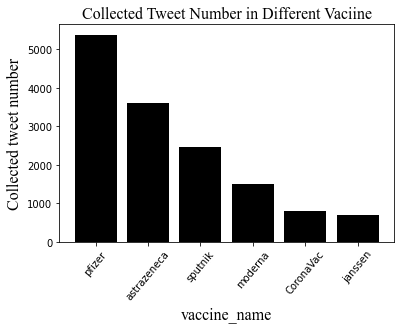

In [57]:
font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}
plt.bar(tweets_data_vaccine_count['vaccine_name'],tweets_data_vaccine_count['count'],color='black')
plt.xlabel('vaccine_name',font)
plt.ylabel('Collected tweet number',font)
plt.title('Collected Tweet Number in Different Vaciine',font)
plt.xticks(rotation=50)
plt.show()

In [58]:
print('The total percentage of the collected English Tweets is: {:.2%}'.format(tweets_data_vaccine['tweet.lang'].value_counts()['en']/tweets_data_vaccine['tweet.lang'].value_counts().sum()))

The total percentage of the collected English Tweets is: 45.98%


### data pro-processing

In [59]:
tweets_data_vaccine_1=tweets_data_vaccine[tweets_data_vaccine['tweet.lang']=='en']

In [60]:
len(tweets_data_vaccine_1)

6618

In [61]:
tweets_data_vaccine_count_1=tweets_data_vaccine_1[['vaccine_name','tweet.full_text']].groupby('vaccine_name').count().reset_index()

In [62]:
tweets_data_vaccine_count_1.columns=['vaccine_name','count']

In [63]:
tweets_data_vaccine_count_1=tweets_data_vaccine_count_1.sort_values(by='count', ascending=False)

In [64]:
tweets_data_vaccine_count_1

,vaccine_name,count
4,pfizer,3371
3,moderna,1307
1,astrazeneca,1190
2,janssen,400
5,sputnik,215
0,CoronaVac,135


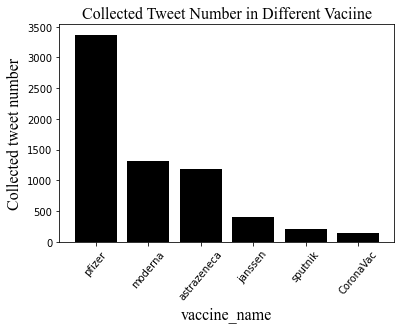

In [65]:
font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}
plt.bar(tweets_data_vaccine_count_1['vaccine_name'],tweets_data_vaccine_count_1['count'],color='black')
plt.xlabel('vaccine_name',font)
plt.ylabel('Collected tweet number',font)
plt.title('Collected Tweet Number in Different Vaciine',font)
plt.xticks(rotation=50)
plt.show()

In [66]:
def preprocess_tweet_text(tweet):
#     set the tweet to lowercase
    tweet=tweet.lower()
#     Filter URL links
    tweet=re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
# Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
# Filter emoticons
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    tweet=re.sub(emoj, '', tweet)    
#     Remove non-alphabetic characters 
    tweet =re.sub("[^a-zA-Z]+", " ", tweet)
#     Break sentences into words.
    tweet=tweet.split()
# Lemmatization: converting a word to its base form
    lemmatizer = WordNetLemmatizer()
    tweet=[lemmatizer.lemmatize(word) for word in tweet]
# Remove common English words
    tweet=[word for word in tweet if not word in stop_words]
#   Remove short words (length strictly less than 3 characters)
    tweet=[word for word in tweet if len(word) > 2]
    
    return " ".join(tweet)
#     return tweet

In [67]:
def preprocess_tweet_text_list(tweet):
#     set the tweet to lowercase
    tweet=tweet.lower()
#     Filter URL links
    tweet=re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
# Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
# Filter emoticons
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    tweet=re.sub(emoj, '', tweet)    
#     Remove non-alphabetic characters 
    tweet =re.sub("[^a-zA-Z]+", " ", tweet)
#     Break sentences into words.
    tweet=tweet.split()
# Lemmatization: converting a word to its base form
    lemmatizer = WordNetLemmatizer()
    tweet=[lemmatizer.lemmatize(word) for word in tweet]
# Remove common English words
    tweet=[word for word in tweet if not word in stop_words]
#   Remove short words (length strictly less than 3 characters)
    tweet=[word for word in tweet if len(word) > 2]
    
#     return " ".join(tweet)
    return tweet

In [68]:
tweets_data_vaccine_1['tweet.full_text_list']=tweets_data_vaccine_1['tweet.full_text'].apply(lambda x:preprocess_tweet_text_list(x))
tweets_data_vaccine_1['tweet.full_text']=tweets_data_vaccine_1['tweet.full_text'].apply(lambda x:preprocess_tweet_text(x))

<ipython-input-68-456b70392ed7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data_vaccine_1['tweet.full_text_list']=tweets_data_vaccine_1['tweet.full_text'].apply(lambda x:preprocess_tweet_text_list(x))
<ipython-input-68-456b70392ed7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_data_vaccine_1['tweet.full_text']=tweets_data_vaccine_1['tweet.full_text'].apply(lambda x:preprocess_tweet_text(x))


In [69]:
tweets_data_vaccine_1.head()

,tweet.full_text,tweet.created_at,tweet.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.id_str,tweet.user.location,tweet.user.url,tweet.user.description,tweet.user.verified,...,tweet.user.favourites_count,tweet.user.statuses_count,tweet.user.listed_count,tweet.user.created_at,tweet.user.profile_image_url_https,tweet.user.default_profile,tweet.user.default_profile_image,tweet.lang,vaccine_name,tweet.full_text_list
2,imagine scandal non tory wed matter week death...,2021-06-07 03:43:40,1401746654643068931,Cash & Carrie,pranerna,928720575064936448,Middle Earth,NaN,NaN,False,...,757,50,0,2017-11-09 20:26:54,https://pbs.twimg.com/profile_images/137931366...,True,False,en,janssen,"[imagine, scandal, non, tory, wed, matter, wee..."
3,government regulator rest assured done rigorou...,2021-06-07 03:37:57,1401745217531912196,latecomer,evenlatercomer,412773158,NaN,NaN,NaN,False,...,173434,54555,4,2011-11-15 03:35:23,https://pbs.twimg.com/profile_images/139950542...,True,False,en,janssen,"[government, regulator, rest, assured, done, r..."
4,government regulator rest assured done rigorou...,2021-06-07 00:56:28,1401704577284587524,Metanoia,ConsciousEvolv8,3149734677,NaN,NaN,Naturopathic lifestyle. Sovereign independent ...,False,...,118,24739,48,2015-04-09 00:05:12,https://pbs.twimg.com/profile_images/757257298...,False,False,en,janssen,"[government, regulator, rest, assured, done, r..."
5,also vaccine june edison high school indoor so...,2021-06-07 00:55:45,1401704395906027522,Em🎲,_emilyfranco28_,2478968856,NaN,NaN,NaN,False,...,7139,2214,5,2014-05-05 23:43:46,https://pbs.twimg.com/profile_images/139381403...,True,False,en,janssen,"[also, vaccine, june, edison, high, school, in..."
6,also vaccine june edison high school indoor so...,2021-06-07 00:36:23,1401699524339326977,mahhh,mysteriouslymah,904266335135293440,"California, USA",NaN,progress not perfection. ...,False,...,13413,2482,0,2017-09-03 08:54:29,https://pbs.twimg.com/profile_images/140013422...,True,False,en,janssen,"[also, vaccine, june, edison, high, school, in..."


### sentiment analysis on Twitter

In [70]:
def load_dataset(filename, cols):
    dataset = pd.read_csv(filename, encoding='latin-1')
    dataset.columns = cols
    return dataset

In [71]:
def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

In [72]:
# implement vectorization using tf-idf
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [73]:
def int_to_string(sentiment):
    if sentiment == 0:
        return "Negative"
    elif sentiment == 2:
        return "Neutral"
    else:
        return "Positive"

In [74]:
# Load dataset
dataset = load_dataset("training.csv", ['target', 't_id', 'created_at', 'query', 'user', 'text'])
# Remove unwanted columns from dataset
dataset = remove_unwanted_cols(dataset, ['t_id', 'created_at', 'query', 'user'])
#Preprocess data
dataset.text = dataset['text'].apply(preprocess_tweet_text)

In [75]:
# Split dataset into Train, Test
# Same tf vector will be used for Testing sentiments on unseen trending data
tf_vector = get_feature_vector(np.array(dataset.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(dataset.iloc[:, 1]).ravel())
y = np.array(dataset.iloc[:, 0]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Training Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)
print(accuracy_score(y_test, y_predict_nb))

# Training Logistics Regression model
LR_model = LogisticRegression(solver='lbfgs',max_iter=10000)
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

0.761440625
0.777440625


In [76]:
test_ds = tweets_data_vaccine_1[['vaccine_name','tweet.full_text']]

# Creating text feature

test_feature = tf_vector.transform(np.array(test_ds.iloc[:, 1]).ravel())

# Using Logistic Regression model for prediction
test_prediction_lr = LR_model.predict(test_feature)

# get the sentiment result to a table
test_result_ds = pd.DataFrame({'vaccine_name': test_ds.vaccine_name, 'prediction':test_prediction_lr})
# convert int to string
test_result_ds['prediction']=test_result_ds['prediction'].apply(lambda x:int_to_string(x))

In [77]:
test_result_ds['count']=1
test_result_ds

,vaccine_name,prediction,count
2,janssen,Negative,1
3,janssen,Positive,1
4,janssen,Positive,1
5,janssen,Negative,1
6,janssen,Negative,1
...,...,...,...
14354,sputnik,Positive,1
14355,sputnik,Negative,1
14360,sputnik,Negative,1
14361,sputnik,Negative,1


In [78]:
test_result_ds_1=test_result_ds.groupby(['vaccine_name','prediction']).count().reset_index()
test_result_ds_1

,vaccine_name,prediction,count
0,CoronaVac,Negative,70
1,CoronaVac,Positive,65
2,astrazeneca,Negative,389
3,astrazeneca,Positive,801
4,janssen,Negative,136
5,janssen,Positive,264
6,moderna,Negative,430
7,moderna,Positive,877
8,pfizer,Negative,1592
9,pfizer,Positive,1779


In [79]:
test_result_ds_sum=test_result_ds_1.groupby('vaccine_name').sum().reset_index()
test_result_ds_sum.columns=['vaccine_name','sum']
test_result_ds_sum

,vaccine_name,sum
0,CoronaVac,135
1,astrazeneca,1190
2,janssen,400
3,moderna,1307
4,pfizer,3371
5,sputnik,215


In [80]:
test_result_ds_1=pd.merge(test_result_ds_1,test_result_ds_sum,how='left',on=["vaccine_name"],right_index=False)

In [81]:
test_result_ds_1

,vaccine_name,prediction,count,sum
0,CoronaVac,Negative,70,135
1,CoronaVac,Positive,65,135
2,astrazeneca,Negative,389,1190
3,astrazeneca,Positive,801,1190
4,janssen,Negative,136,400
5,janssen,Positive,264,400
6,moderna,Negative,430,1307
7,moderna,Positive,877,1307
8,pfizer,Negative,1592,3371
9,pfizer,Positive,1779,3371


In [82]:
test_result_ds_1['rate']=test_result_ds_1['count']/test_result_ds_1['sum']

In [83]:
positive_rate=test_result_ds_1[test_result_ds_1['prediction']=='Positive'].sort_values(by='rate', ascending=False)

In [84]:
positive_rate

,vaccine_name,prediction,count,sum,rate
3,astrazeneca,Positive,801,1190,0.673109
7,moderna,Positive,877,1307,0.671002
5,janssen,Positive,264,400,0.660000
11,sputnik,Positive,128,215,0.595349
9,pfizer,Positive,1779,3371,0.527737
1,CoronaVac,Positive,65,135,0.481481


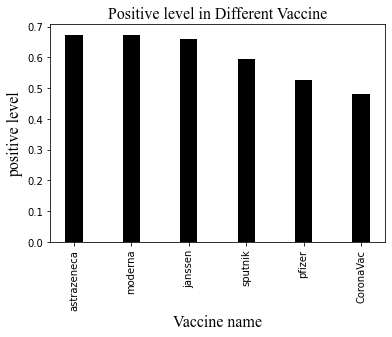

In [85]:
font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}
plt.bar(positive_rate['vaccine_name'],positive_rate['rate'],color='black',width=0.3)
plt.xlabel('Vaccine name',font)
plt.ylabel('positive level',font)
plt.title('Positive level in Different Vaccine',font)
plt.xticks(rotation=90)
plt.show()

In [86]:
tweets_data_vaccine_1.head()

,tweet.full_text,tweet.created_at,tweet.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.id_str,tweet.user.location,tweet.user.url,tweet.user.description,tweet.user.verified,...,tweet.user.favourites_count,tweet.user.statuses_count,tweet.user.listed_count,tweet.user.created_at,tweet.user.profile_image_url_https,tweet.user.default_profile,tweet.user.default_profile_image,tweet.lang,vaccine_name,tweet.full_text_list
2,imagine scandal non tory wed matter week death...,2021-06-07 03:43:40,1401746654643068931,Cash & Carrie,pranerna,928720575064936448,Middle Earth,NaN,NaN,False,...,757,50,0,2017-11-09 20:26:54,https://pbs.twimg.com/profile_images/137931366...,True,False,en,janssen,"[imagine, scandal, non, tory, wed, matter, wee..."
3,government regulator rest assured done rigorou...,2021-06-07 03:37:57,1401745217531912196,latecomer,evenlatercomer,412773158,NaN,NaN,NaN,False,...,173434,54555,4,2011-11-15 03:35:23,https://pbs.twimg.com/profile_images/139950542...,True,False,en,janssen,"[government, regulator, rest, assured, done, r..."
4,government regulator rest assured done rigorou...,2021-06-07 00:56:28,1401704577284587524,Metanoia,ConsciousEvolv8,3149734677,NaN,NaN,Naturopathic lifestyle. Sovereign independent ...,False,...,118,24739,48,2015-04-09 00:05:12,https://pbs.twimg.com/profile_images/757257298...,False,False,en,janssen,"[government, regulator, rest, assured, done, r..."
5,also vaccine june edison high school indoor so...,2021-06-07 00:55:45,1401704395906027522,Em🎲,_emilyfranco28_,2478968856,NaN,NaN,NaN,False,...,7139,2214,5,2014-05-05 23:43:46,https://pbs.twimg.com/profile_images/139381403...,True,False,en,janssen,"[also, vaccine, june, edison, high, school, in..."
6,also vaccine june edison high school indoor so...,2021-06-07 00:36:23,1401699524339326977,mahhh,mysteriouslymah,904266335135293440,"California, USA",NaN,progress not perfection. ...,False,...,13413,2482,0,2017-09-03 08:54:29,https://pbs.twimg.com/profile_images/140013422...,True,False,en,janssen,"[also, vaccine, june, edison, high, school, in..."


In [92]:
test_result_ds=pd.merge(test_result_ds,tweets_data_vaccine_1[['tweet.full_text']],left_index=True,right_index=True, how='outer')

In [93]:
test_result_ds

,vaccine_name,prediction,count,tweet.full_text_list,tweet.full_text
2,janssen,Negative,1,"[imagine, scandal, non, tory, wed, matter, wee...",imagine scandal non tory wed matter week death...
3,janssen,Positive,1,"[government, regulator, rest, assured, done, r...",government regulator rest assured done rigorou...
4,janssen,Positive,1,"[government, regulator, rest, assured, done, r...",government regulator rest assured done rigorou...
5,janssen,Negative,1,"[also, vaccine, june, edison, high, school, in...",also vaccine june edison high school indoor so...
6,janssen,Negative,1,"[also, vaccine, june, edison, high, school, in...",also vaccine june edison high school indoor so...
...,...,...,...,...,...
14354,sputnik,Positive,1,"[according, radio, ndeke, luka, two, police, c...",according radio ndeke luka two police car hit ...
14355,sputnik,Negative,1,"[according, radio, ndeke, luka, two, police, c...",according radio ndeke luka two police car hit ...
14360,sputnik,Negative,1,"[breaking, three, russian, reportedly, killed,...",breaking three russian reportedly killed explo...
14361,sputnik,Negative,1,"[breaking, three, russian, reportedly, killed,...",breaking three russian reportedly killed explo...


In [94]:
# 首先来研究pfizer的负面新闻
test_result_ds_pfizerneg=test_result_ds[(test_result_ds['vaccine_name']=='pfizer') & (test_result_ds['prediction']=='Negative')]

In [95]:
test_result_ds_pfizerneg.head()

,vaccine_name,prediction,count,tweet.full_text_list,tweet.full_text
2986,pfizer,Negative,1,"[another, tone, deaf, tweet, self, entitled, p...",another tone deaf tweet self entitled politici...
2990,pfizer,Negative,1,"[got, nothing, nice, say, either, annastaciapa...",got nothing nice say either annastaciapalaszcz...
2993,pfizer,Negative,1,"[hour, since, second, dose, pfizer, covid, vac...",hour since second dose pfizer covid vaccine fe...
3002,pfizer,Negative,1,"[reluctance, vaccinated, simple, lack, choice,...",reluctance vaccinated simple lack choice would...
3006,pfizer,Negative,1,"[pfizer, vaccine, available, anyone, year, old...",pfizer vaccine available anyone year old older...


In [96]:
test_result_ds_pfizerneg_sen=test_result_ds_pfizerneg['tweet.full_text'].sum()

In [97]:
len(test_result_ds_pfizerneg_sen)

141273

In [98]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

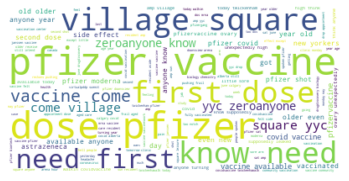

In [99]:
# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(test_result_ds_pfizerneg_sen)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [100]:
# 研究ConronaVac的负面新闻
test_result_ds_ConronaVacneg=test_result_ds[(test_result_ds['vaccine_name']=='CoronaVac') & (test_result_ds['prediction']=='Negative')]

In [101]:
test_result_ds_ConronaVacneg_sen=test_result_ds_ConronaVacneg['tweet.full_text'].sum()

In [102]:
len(test_result_ds_ConronaVacneg_sen)

5944

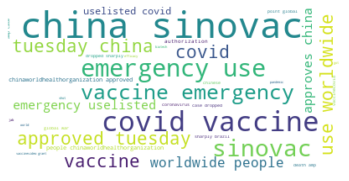

In [103]:
# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(test_result_ds_ConronaVacneg_sen)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [104]:
# moderna的正面评价
test_result_ds_modernapos=test_result_ds[(test_result_ds['vaccine_name']=='moderna') & (test_result_ds['prediction']=='Positive')]

In [105]:
test_result_ds_modernaneg_sen=test_result_ds_modernapos['tweet.full_text'].sum()

In [106]:
len(test_result_ds_modernaneg_sen)

72722

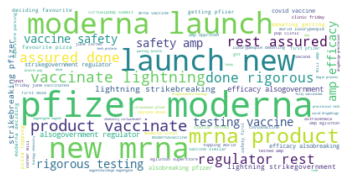

In [107]:
# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(test_result_ds_modernaneg_sen)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [108]:
# az的正面评价
test_result_ds_astrazenecapos=test_result_ds[(test_result_ds['vaccine_name']=='astrazeneca') & (test_result_ds['prediction']=='Positive')]

In [109]:
test_result_ds_astrazenecapos_sen=test_result_ds_astrazenecapos['tweet.full_text'].sum()

In [110]:
len(test_result_ds_astrazenecapos_sen)

69075

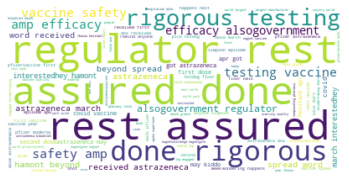

In [111]:
# Generate a word cloud image
wordcloud = WordCloud( background_color="white").generate(test_result_ds_astrazenecapos_sen)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [112]:
test_result_ds_modernapos['tweet.full_text'][-200:-150]

1789    people debating getting pfizer moderna decidin...
1790    bny mellon crypto plan ireland chinese languag...
1791    people debating getting pfizer moderna decidin...
1794    bitcoin ethereum still consolidate doge rally ...
1797    finally realized vaccineshortage vaccineforall...
1798              hey safety first pfizer moderna vaccine
1802              hey safety first pfizer moderna vaccine
1803                                                     
1804    people debating getting pfizer moderna decidin...
1808    agree wife fully vaccinated vaccinated getting...
1809    agree wife fully vaccinated vaccinated getting...
1812              hey safety first pfizer moderna vaccine
1813    donating vishwaguru bharat atamnirbharbharat m...
1815    people debating getting pfizer moderna decidin...
1818    people debating getting pfizer moderna decidin...
1823       irritability known side effect moderna vaccine
1824    people debating getting pfizer moderna decidin...
1825    ecstat

In [113]:
tweets_data_vaccine['tweet.full_text'][2077]

'So my Mom booked her second #CovidVaccine .. she had #moderna the first time and was told for this one they wouldn’t know in advance if it would be #pfizer or #moderna, claim they don’t know until day of. Guess they aren’t concerned about #mRNA vaccines being mixed? #SurreyBC'

### 研究一下疫苗的转发占比，因为我发现数据中很多都是转发的。

In [114]:
# retweets 
def if_retweets(string):
#     check if the string starts with RT, if it does, then return 1, else return 0
    if string.startswith('RT '):
        return 1
    else:
        return 0

In [115]:
tweets_data_vaccine['if_retweets']=tweets_data_vaccine['tweet.full_text'].apply(lambda x:if_retweets(x))

In [116]:
tweets_data_groupbyvaccine_1=tweets_data_vaccine[['vaccine_name','if_retweets']].groupby("vaccine_name").sum(['if_retweets']).reset_index()
tweets_data_groupbyvaccine_2=tweets_data_vaccine[['vaccine_name','if_retweets']].groupby("vaccine_name").count().reset_index()
tweets_data_groupbyvaccine_2.columns=['vaccine_name','total_number']
tweets_data_groupbyvaccine=pd.merge(tweets_data_groupbyvaccine_1,tweets_data_groupbyvaccine_2,how='left',on=["vaccine_name"],right_index=False)

In [117]:
tweets_data_groupbyvaccine['retweet_percentage']=tweets_data_groupbyvaccine['if_retweets']/tweets_data_groupbyvaccine['total_number']
tweets_data_groupbyvaccine=tweets_data_groupbyvaccine.sort_values(by='retweet_percentage', ascending=False)
tweets_data_groupbyvaccine

,vaccine_name,if_retweets,total_number,retweet_percentage
5,sputnik,2038,2450,0.831837
1,astrazeneca,2683,3588,0.747770
0,CoronaVac,556,799,0.695870
2,janssen,444,691,0.642547
4,pfizer,3392,5374,0.631187
3,moderna,881,1490,0.591275
